In [58]:
import pickle

X_chair = pickle.load(open("X_chair.p","rb"))
Y_chair = pickle.load(open("Y_chair.p","rb"))
X_chair_median = pickle.load(open("X_median_chair.p","rb"))
Y_chair_median = pickle.load(open("Y_median_chair.p","rb"))
X_chair_mean = pickle.load(open("X_mean_chair.p","rb"))
Y_chair_mean = pickle.load(open("Y_mean_chair.p","rb"))

X_Neck = pickle.load(open("X_Neck.p","rb"))
Y_Neck = pickle.load(open("Y_Neck.p","rb"))
X_Neck_median = pickle.load(open("X_median_Neck.p","rb"))
Y_Neck_median = pickle.load(open("Y_median_Neck.p","rb"))
X_Neck_mean = pickle.load(open("X_mean_Neck.p","rb"))
Y_Neck_mean = pickle.load(open("Y_mean_Neck.p","rb"))


In [36]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import random

In [37]:
#Classifying all chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Define Dataset
X = np.array(X_chair)
Y = np.array(Y_chair)

#Define parameters to optimize
tuned_parameters = [{'n_estimators':[6,8,10,12,14,16,18],'criterion': ['gini','entropy'],
                     'max_features':[1,2,3,4,5,6], 'max_depth': [5,6,7,8,9,10]}]
                     #'class_weight': ['balanced',None], 'bootstrap':[True,False], 'warm_start':[True,False],
                     #'oob_score':[True,False], 'verbose':[0,1,2]}]

#Set the Classifier fit and tune parameters
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,tuned_parameters)
clf.fit(X, Y)

BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = RandomForestClassifier(n_estimators=BP['n_estimators'],
                                  criterion=BP['criterion'],
                                  max_depth=BP['max_depth'],
                                  max_features=BP['max_features'],
                                  #class_weight=BP['class_weight'],
                                  #bootstrap=BP['bootstrap'],
                                  #warm_start=BP['warm_start'],
                                  #oob_score=BP['oob_score'],
                                  #verbose=BP['verbose'],
                                  n_jobs=-1)
    kf = KFold(n_splits=k)
#     kf_scores = [clf1.fit(X[train], Y[train]).score(X[test], Y[test]) for train, test in kf.split(X)]
    sc = []
    
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')

print(BP)
print(clf1.feature_importances_)

0.699612588528
  
  
{'criterion': 'gini', 'max_depth': 8, 'max_features': 5, 'n_estimators': 18}
[ 0.0743205   0.03353171  0.05292721  0.04779314  0.5951061   0.19632133]


[[513  12  34 107 186   0   0]
 [  8 560  49  11  18   0   0]
 [ 22  13 140  19  15   0   0]
 [ 60   0  28 426  43   0   0]
 [ 43   6  27  26 205   0   0]
 [  0   0   0   0   0 334  11]
 [  0   0   0   0   1 274 943]]


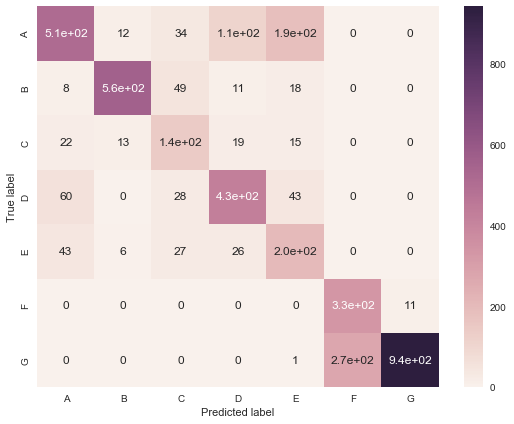

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [65]:
#Classifying mean chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Define Dataset
X = np.array(X_chair_mean)
Y = np.array(Y_chair_mean)

#Define parameters to optimize
tuned_parameters = [{'n_estimators':[6,8,10,12,14,16,18],'criterion': ['gini','entropy'],
                     'max_features':[1,2,3,4,5,6], 'max_depth': [5,6,7,8,9,10]}]
                     #'class_weight': ['balanced',None], 'bootstrap':[True,False], 'warm_start':[True,False],
                     #'oob_score':[True,False], 'verbose':[0,1,2]}]

#Set the Classifier fit and tune parameters
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,tuned_parameters)
clf.fit(X, Y)

BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = RandomForestClassifier(n_estimators=BP['n_estimators'],
                                  criterion=BP['criterion'],
                                  max_depth=BP['max_depth'],
                                  max_features=BP['max_features'],
                                  #class_weight=BP['class_weight'],
                                  #bootstrap=BP['bootstrap'],
                                  #warm_start=BP['warm_start'],
                                  #oob_score=BP['oob_score'],
                                  #verbose=BP['verbose'],
                                  n_jobs=-1)

    kf = KFold(n_splits=k)
#     kf_scores = [clf1.fit(X[train], Y[train]).score(X[test], Y[test]) for train, test in kf.split(X)]
    sc = []
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')

# print(BP)
print(clf1.feature_importances_)

0.86
  
  
[ 0.17250575  0.10097101  0.16043762  0.20170387  0.13602235  0.2283594 ]


[[ 8  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0]
 [ 0  0  6  0  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0 10]]


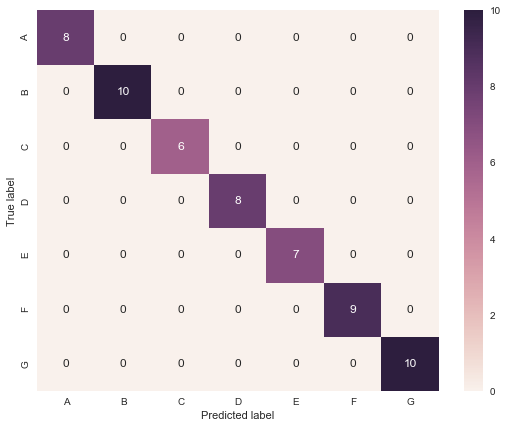

In [72]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [41]:
#Classifying median chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Define Dataset
X = np.array(X_chair_median)
Y = np.array(Y_chair_median)

#Define parameters to optimize
tuned_parameters = [{'n_estimators':[6,8,10,12,14,16,18,20],'criterion': ['gini','entropy'],
                     'max_features':[1,2,3,4,5,6], 'max_depth': [5,6,7,8,9,10,11,12,13,None]}]
                     #'class_weight': ['balanced',None], 'bootstrap':[True,False], 'warm_start':[True,False],
                     #'oob_score':[True,False], 'verbose':[0,1,2]}]

# #Set the Classifier fit and tune parameters
# rfc = RandomForestClassifier()
# clf = GridSearchCV(rfc,tuned_parameters)
# clf.fit(X, Y)

# BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = RandomForestClassifier(n_estimators=BP['n_estimators'],
                                  criterion=BP['criterion'],
                                  max_depth=BP['max_depth'],
                                  max_features=BP['max_features'],
                                  #class_weight=BP['class_weight'],
                                  #bootstrap=BP['bootstrap'],
                                  #warm_start=BP['warm_start'],
                                  #oob_score=BP['oob_score'],
                                  #verbose=BP['verbose'],
                                  n_jobs=-1)

    kf = KFold(n_splits=k)
#     kf_scores = [clf1.fit(X[train], Y[train]).score(X[test], Y[test]) for train, test in kf.split(X)]
    sc = []
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')

# print(BP)
# print(clf1.feature_importances_)

0.79
  
  


[[ 8  0  0  0  0  0  0]
 [ 0 10  1  0  0  0  0]
 [ 0  0  5  0  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0 10]]


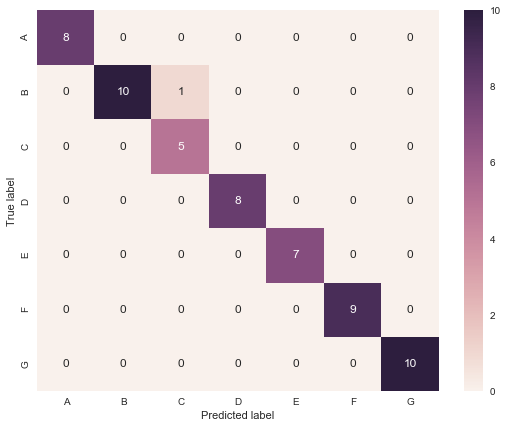

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [43]:
#Classifying all neck chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Define Dataset
X = np.array(X_Neck)
Y = np.array(Y_Neck)

#Define parameters to optimize
tuned_parameters = [{'n_estimators':[6,8,10,12,14,16,18,20],'criterion': ['gini','entropy'],
                     'max_features':[1,2,3,4,5,6], 'max_depth': [5,6,7,8,9,10,11,12,13,None]}]
                     #'class_weight': ['balanced',None], 'bootstrap':[True,False], 'warm_start':[True,False],
                     #'oob_score':[True,False], 'verbose':[0,1,2]}]

# #Set the Classifier fit and tune parameters
# rfc = RandomForestClassifier()
# clf = GridSearchCV(rfc,tuned_parameters)
# clf.fit(X, Y)

# BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = RandomForestClassifier(n_estimators=BP['n_estimators'],
                                  criterion=BP['criterion'],
                                  max_depth=BP['max_depth'],
                                  max_features=BP['max_features'],
                                  #class_weight=BP['class_weight'],
                                  #bootstrap=BP['bootstrap'],
                                  #warm_start=BP['warm_start'],
                                  #oob_score=BP['oob_score'],
                                  #verbose=BP['verbose'],
                                  n_jobs=-1)

    kf = KFold(n_splits=k)
#     kf_scores = [clf1.fit(X[train], Y[train]).score(X[test], Y[test]) for train, test in kf.split(X)]
    sc = []
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')

# print(BP)
# print(clf1.feature_importances_)

0.852081280788
  
  


[[113   0   0   0   0   3   1]
 [  0  88   0   1   1   0   0]
 [  0   0  93   0   0   1   0]
 [  0   0   0  42   0   0   0]
 [  0   0   0   0  20   0   0]
 [  0   0   0   0   0  81   0]
 [  0   0   0   0   0   0 126]]


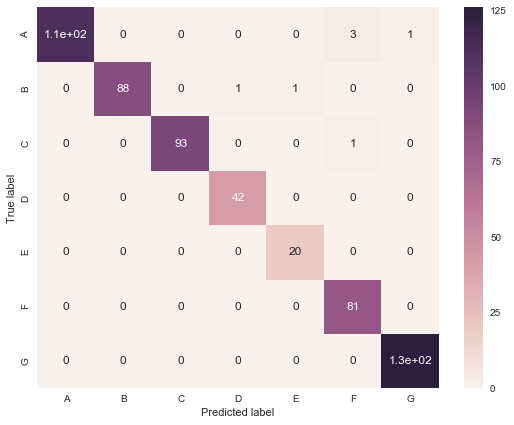

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [52]:
#Classifying mean neck chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Define Dataset
X = np.array(X_Neck_mean)
Y = np.array(Y_Neck_mean)

#Define parameters to optimize
tuned_parameters = [{'n_estimators':[6,8,10,12,14,16,18,20],'criterion': ['gini','entropy'],
                     'max_features':[1,2,3,4,5,6], 'max_depth': [5,6,7,8,9,10,11,12,13,None]}]
                     #'class_weight': ['balanced',None], 'bootstrap':[True,False], 'warm_start':[True,False],
                     #'oob_score':[True,False], 'verbose':[0,1,2]}]

#Set the Classifier fit and tune parameters
# rfc = RandomForestClassifier()
# clf = GridSearchCV(rfc,tuned_parameters)
# clf.fit(X, Y)

# BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = RandomForestClassifier(n_estimators=BP['n_estimators'],
                                  criterion=BP['criterion'],
                                  max_depth=BP['max_depth'],
                                  max_features=BP['max_features'],
                                  #class_weight=BP['class_weight'],
                                  #bootstrap=BP['bootstrap'],
                                  #warm_start=BP['warm_start'],
                                  #oob_score=BP['oob_score'],
                                  #verbose=BP['verbose'],
                                  n_jobs=-1)

    kf = KFold(n_splits=k)
#     kf_scores = [clf1.fit(X[train], Y[train]).score(X[test], Y[test]) for train, test in kf.split(X)]
    sc = []
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')

# print(BP)
print(clf1.feature_importances_)

0.726666666667
  
  
[ 0.22283102  0.13280866  0.08447597  0.11446095  0.15882026  0.
  0.07450022  0.11847683  0.09362609]


[[ 6  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0 10]]


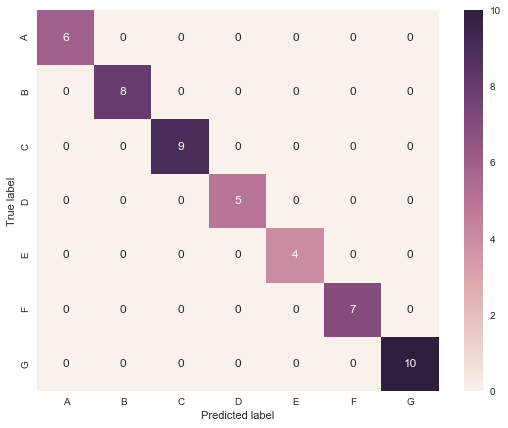

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [47]:
#Classifying median neck chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Define Dataset
X = np.array(X_Neck_median)
Y = np.array(Y_Neck_median)

#Define parameters to optimize
tuned_parameters = [{'n_estimators':[6,8,10,12,14,16,18,20],'criterion': ['gini','entropy'],
                     'max_features':[1,2,3,4,5,6], 'max_depth': [5,6,7,8,9,10,11,12,13,None]}]
                     #'class_weight': ['balanced',None], 'bootstrap':[True,False], 'warm_start':[True,False],
                     #'oob_score':[True,False], 'verbose':[0,1,2]}]

# #Set the Classifier fit and tune parameters
# rfc = RandomForestClassifier()
# clf = GridSearchCV(rfc,tuned_parameters)
# clf.fit(X, Y)

# BP = clf.best_params_

#K-fold cross validation with the optimized parameters
for k in range(20,21):
    clf1 = RandomForestClassifier(n_estimators=BP['n_estimators'],
                                  criterion=BP['criterion'],
                                  max_depth=BP['max_depth'],
                                  max_features=BP['max_features'],
                                  #class_weight=BP['class_weight'],
                                  #bootstrap=BP['bootstrap'],
                                  #warm_start=BP['warm_start'],
                                  #oob_score=BP['oob_score'],
                                  #verbose=BP['verbose'],
                                  n_jobs=-1)

    kf = KFold(n_splits=k)
#     kf_scores = [clf1.fit(X[train], Y[train]).score(X[test], Y[test]) for train, test in kf.split(X)]
    sc = []
    for it in range(5):
        combined = list(zip(X, Y))
        random.shuffle(combined)

        X_shuffled, Y_shuffled = zip(*combined)
        X_shuffled = np.array(X_shuffled)
        Y_shuffled = np.array(Y_shuffled)
        kf_scores = [clf1.fit(X_shuffled[train], Y_shuffled[train]).score(X_shuffled[test], Y_shuffled[test]) for train, test in kf.split(X)]
        kf_scores_mean = np.mean(kf_scores)
        sc.append(kf_scores_mean)
    
    
#     print('K = '+str(k+2))
#     print('KF_scores_array')
#     print(kf_scores)
#     print('  ')
#     print('KF_scores_mean')
    print(np.mean(sc))
    print('  ')
    print('  ')

# print(BP)
# print(clf1.feature_importances_)

0.726666666667
  
  


[[ 6  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  9  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0 10]]


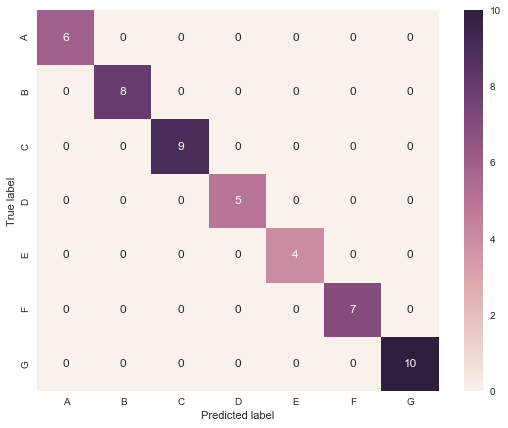

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

# Compute confusion matrix
cnf_matrix = confusion_matrix(clf1.fit(X, Y).predict(X), Y)
print(cnf_matrix)

# Plot confusion matrix
df_cm = pd.DataFrame(cnf_matrix, index = [i for i in "ABCDEFG"],
                  columns = [i for i in "ABCDEFG"])
plt.figure(figsize = (9,7))
sn.heatmap(df_cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [70]:
Features_model = np.array(X_chair_mean)
Features_model[:,5]

array([  5.72151899,   4.98734177,   5.9125    ,   5.2375    ,
         6.0875    ,   5.8375    ,   5.44705882,   5.57831325,
         9.11842105,   9.76388889,  10.        ,  10.54545455,
         9.90243902,  10.43421053,  10.        ,   8.8045977 ,
        10.31313131,  11.63636364,   7.67924528,   8.37931034,
         8.27272727,   6.16666667,   7.83870968,   9.14516129,
         6.07692308,   6.54761905,   7.60465116,   9.3       ,
         6.41111111,   6.        ,   7.1       ,   6.4494382 ,
         7.046875  ,   6.        ,   6.13846154,   6.19402985,
         6.07352941,   5.77777778,   6.26086957,  20.14925373,
        17.10294118,  17.09090909,  16.01470588,  15.82352941,
         7.92537313,   4.26470588,   3.80882353,   4.32352941,
        15.65979381,  17.57291667,  15.47916667,  15.60416667,
        14.17894737,  16.23157895,  16.08510638,  16.72631579,
        17.44791667,  16.13829787])

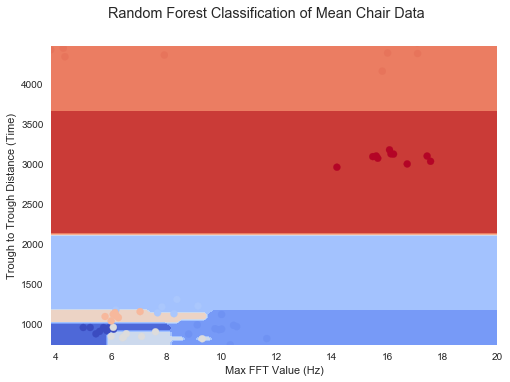

In [71]:
#Plotting mean chair data with [Aravind, Isabella, Kim, Lobna, Thomas, Anand, Vasu]

#Set up Prediction Model
#Set the feature values and the output values
Features_model = np.array(X_chair_mean)
Y_model = np.array(Y_chair_mean)

feature1 = 5
feature2 = 3
features = ['Peak Amplitude (V)','Trough Amplitude (V)', 'Peak to Peak Distance (Time)', 
            'Trough to Trough Distance (Time)', 'Peak to Trough Distance (Time)', 'Max FFT Value (Hz)']

X1 = Features_model[:,feature1]
X2 = Features_model[:,feature2]



#Optimizing Parameters
#Define Dataset
A = np.array(X_chair_mean)
B = np.array(Y_chair_mean)

#Define parameters to optimize
tuned_parameters = [{'n_estimators':[6,8,10,12,14,16,18,20],'criterion': ['gini','entropy'],
                     'max_features':[1,2,3,4,5,6], 'max_depth': [5,6,7,8,9,10,11,12,13,None]}]

#Set the Classifier fit and tune parameters
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,tuned_parameters)
clf.fit(A, B)

BP = clf.best_params_

#Set Classifier and Fit the data
clf1 = RandomForestClassifier(n_estimators=BP['n_estimators'],
                              criterion=BP['criterion'],
                              max_depth=BP['max_depth'],
                              max_features=BP['max_features'])
                              #presort=BP['presort'],
clf1.fit(np.c_[X1,X2],Y_model)


#Set up the steps in the grid mesh
plot_step_x1 = (max(X1)-min(X1))/100
plot_step_x2 = (max(X2)-min(X2))/100

# Let's pre-compute the range for our features
x1_min, x1_max = X1.min(), X1.max()
x2_min, x2_max = X2.min(), X2.max()

# And create a meshgrid so that we can create a countour plot on it
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, plot_step_x1),
                     np.arange(x2_min, x2_max, plot_step_x2))

# Now we predict the values for all of the cells in the meshgrid
Z = clf1.predict(np.c_[xx1.ravel(), xx2.ravel()]) # If you're curious what this is, read here: https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html and https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html

# And we reshape those results to have the same shape as the mesh
Z = Z.reshape(xx1.shape)

# Now we can finally contour-plot, using a specific colormap
cs = plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm)

plt.xlabel(features[feature1])
plt.ylabel(features[feature2])
plt.axis("tight")

# Plot also the training points
plt.scatter(X1, X2, c=Y_model, cmap=plt.cm.coolwarm)

plt.suptitle("Random Forest Classification of Mean Chair Data")
plt.show()
